## Load BrainIAC

In [ ]:
import torch 
from load_brainiac import load_brainiac

# path to the checkpoint
checkpoint = "/path/to/brainiac_weights"
device = "cuda"

model = load_brainiac(checkpoint, device)
print(f"Model loaded successfully from {checkpoint}!")

# Vizualize Saliency Maps 

(128, 128, 128) (128, 128, 128) 1.0 0.0014637382701039314


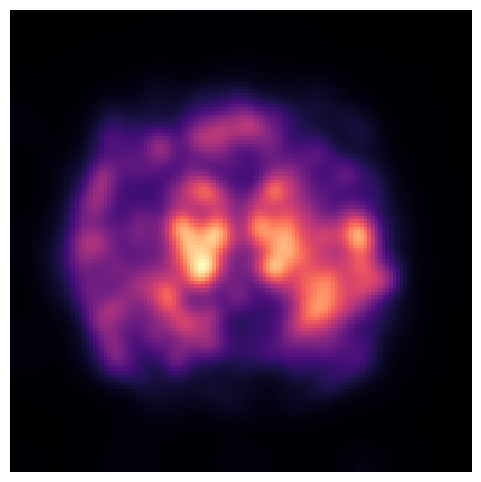

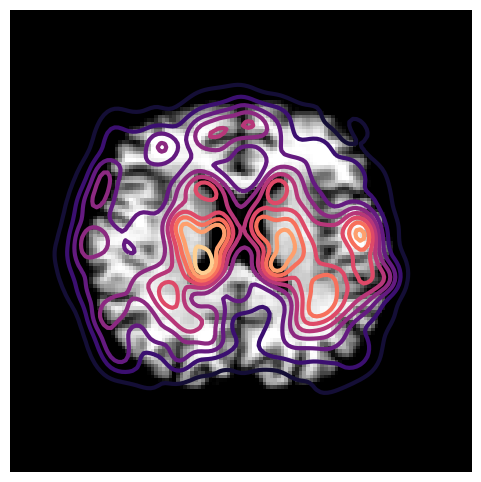

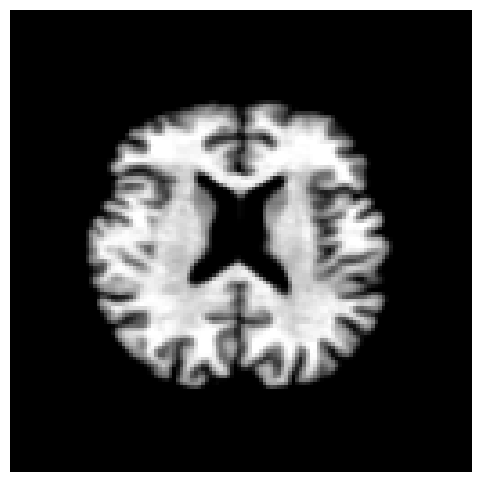

In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the NIfTI files
mri_nifti_path = f'XXXX_image.nii.gz' 
saliency_nifti_path = f'XXXX_saliencymap.nii.gz'

mri_img = nib.load(mri_nifti_path)
saliency_img = nib.load(saliency_nifti_path)
mri_data = mri_img.get_fdata()
saliency_data = saliency_img.get_fdata()

print(mri_data.shape, saliency_data.shape, np.max(mri_data), np.max(saliency_data))

# Select a 2D slice based on a index number 
slice_idx = mri_data.shape[2] // 2 
mri_slice = mri_data[:, :, slice_idx]
saliency_slice = saliency_data[:, :, slice_idx]

# Normalize the MRI slice using robust normalization (1st and 99th percentiles)
def normalize_image(img):
    p1, p99 = np.percentile(img, (1, 99))
    img_clipped = np.clip(img, p1, p99)
    img_normalized = (img_clipped - p1) / (p99 - p1)
    return img_normalized

mri_slice_norm = normalize_image(mri_slice)

# Normalization function 
def normalize_saliency(saliency):
    saliency[saliency < 0] = 0
    if np.max(saliency) > 0:
        saliency_normalized = saliency / np.max(saliency)
    else:
        saliency_normalized = saliency
    return saliency_normalized

# Apply Gaussian blur to smooth the saliency map and normalize
saliency_slice_blurred = cv2.GaussianBlur(saliency_slice, (15, 15), 0)
saliency_slice_norm = normalize_saliency(saliency_slice_blurred)

# Apply a threshold to the saliency map
threshold_value = 0.0 
saliency_slice_thresholded = np.where(saliency_slice_norm > threshold_value, saliency_slice_norm, 0)

#  thresholded saliency map
plt.figure(figsize=(6, 6))
plt.imshow(saliency_slice_thresholded.T, cmap='magma', interpolation='none', origin='lower')
plt.axis('off')  

#  MRI slice with contour overlay of the thresholded saliency map
plt.figure(figsize=(6, 6))
plt.imshow(mri_slice_norm.T, cmap='gray', interpolation='none', origin='lower')
plt.contour(saliency_slice_thresholded.T, levels=10, cmap='magma', origin='lower', linewidths=3)  # Adjust the linewidth value as needed
plt.axis('off')  # Remove axis for better visualization


#  MRI slice alone (no overlay)
plt.figure(figsize=(6, 6))
plt.imshow(mri_slice_norm.T, cmap='gray', interpolation='none', origin='lower')
plt.axis('off') 


plt.show()  
